In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import os
import glob
import datetime

In [2]:
# credible; makes dictionary of datasets sorted by user (credible), and dataframe of all credible tweets with username as additional column (credible_df) 
df_path = glob.glob('./HealthOrg/*.csv')
df_ls = []

for path in df_path:
    df = pd.read_csv(path)
    df = df[['username', 'tweet','date', 'replies_count','retweets_count','likes_count','hashtags','retweet']]

    # general keywords used for dataset 4: ncov19, ncov2019, covid, rona, stayathome, socialdistancing
    covid = df.loc[df['tweet'].str.contains('covid|coronavirus|rona|wearamask|socialdistancing|stayathome|ncov|symptomatic|covax', case=False)]

    df_ls.append(covid)

healthorg_df = pd.concat(df_ls, ignore_index = True)

# fix dates

dates = []
for date in healthorg_df["date"]:
    test = datetime.datetime.strptime(date, "%Y-%m-%d")
    dates.append(test.date())

healthorg_df["date"] = dates

# filter for tweets in first half of 2020

healthorg_df = healthorg_df[healthorg_df["date"] <= datetime.date(2020,6,30)]
healthorg_df = healthorg_df.drop_duplicates("tweet")

df_names = []
for line in healthorg_df["username"].unique():
    df_names.append(line)


In [3]:
# News_Outlets
df_path = glob.glob('./News_Outlets/*.csv')
df_ls = []

for path in df_path:
    df = pd.read_csv(path)
    df = df[['username', 'tweet', 'date', 'replies_count','retweets_count','likes_count','hashtags','retweet']]

    # general keywords used for dataset 4: ncov19, ncov2019, covid, rona, stayathome, socialdistancing
    covid = df.loc[df['tweet'].str.contains('covid|coronavirus|rona|wearamask|socialdistancing|stayathome|ncov|symptomatic|covax', case=False)]
    
    df_ls.append(covid)

news_df = pd.concat(df_ls, ignore_index = True)

dates = []

for date in news_df["date"]:
    test = datetime.datetime.strptime(date, "%Y-%m-%d")
    dates.append(test.date())

news_df["date"] = dates
news_df = news_df[news_df["date"] <= datetime.date(2020,6,30)]
news_df = news_df.drop_duplicates("tweet")

for line in news_df["username"].drop_duplicates():
    df_names.append(line)

C:\Users\Maggie\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
# Individual
df_path = glob.glob('./Individual/*.csv')
trump = pd.read_csv("./Individual/trump_tweets.csv") #https://www.kaggle.com/codebreaker619/donald-trump-tweets-dataset
df_ls = []

for path in df_path:
    try:
        df = pd.read_csv(path)
        df = df[['username', 'tweet','date', 'replies_count','retweets_count','likes_count','hashtags','retweet']]

    # general keywords used for dataset 4: ncov19, ncov2019, covid, rona, stayathome, socialdistancing
        covid = df.loc[df['tweet'].str.contains('covid|coronavirus|rona|wearamask|socialdistancing|stayathome|ncov|symptomatic|covax', case=False)]
        df_ls.append(covid)

    except:
        continue

ind_df = pd.concat(df_ls, ignore_index = True)

dates = []

for date in ind_df["date"]:
    test = datetime.datetime.strptime(date, "%Y-%m-%d")
    dates.append(test.date())

ind_df["date"] = dates
ind_df = ind_df[ind_df["date"] <= datetime.date(2020, 6, 30)]
ind_df = ind_df.drop_duplicates("tweet")

for line in ind_df["username"].drop_duplicates():
    df_names.append(line)

# rename dataset columns to match others
trump["tweet"] = trump["text"]
trump["retweets_count"] = trump["retweets"]
trump["likes_count"] = trump["favorites"]
trump["retweet"] = trump["isRetweet"]
trump = trump[["tweet", "date", "retweets_count", "likes_count", "retweet"]]

#filter dates
trump_dates = trump["date"]
trump_dates_corr = []
trump_dates_corr = [d[:10] for d in trump_dates]
trump_dates_corr = [datetime.datetime.strptime(d, "%Y-%m-%d") for d in trump_dates_corr]
trump["date"] = trump_dates_corr
trump = trump[trump["date"] >= datetime.datetime(2019,12,31)]
trump = trump[trump["date"] <= datetime.datetime(2020, 6, 30)]

# add to individual tweets dataframe
ind_df = pd.concat([ind_df, trump])

for line in ind_df["username"].drop_duplicates().dropna():
    df_names.append(line)


In [101]:
# fake news

CMUID = pd.read_csv("./fake news/CMUID_hydrated.csv", index_col=0)
covidFake = pd.read_csv("./fake news/covidFakesID_reformatted.csv", index_col=0)
misinformation = pd.read_csv("./fake news/Misinformation_hydrated.csv", index_col=0)
fakeTweets = pd.read_csv("./Cross-SEAN Dataset/Fake_Tweets.csv", index_col=0)

fake = [CMUID, covidFake, misinformation, fakeTweets]

dfs = pd.concat(fake)

dfs = dfs[["user_name", "user_screen_name", "text", "created_at", "retweet_count", "favorite_count", "hashtags", "user_followers_count", "user_verified"]]

fake_dfs = dfs

# fake_dfs = pd.concat([fake_dfs, dfs])

# fix date

dates = fake_dfs["created_at"]
dates = [date[4:10] + " " + date[-4:] for date in dates]

for i in range(len(dates)):
    test = datetime.datetime.strptime(dates[i], "%b %d %Y")
    dates[i] = test.date()

# reassigned back to df

fake_dfs["date"] = dates
fake_dfs = fake_dfs.drop("created_at", axis=1)

fake_dfs = fake_dfs[fake_dfs["date"] >= datetime.date(2019,12,31)]
fake_dfs = fake_dfs[fake_dfs["date"] <= datetime.date(2020,6,30)]
fake_dfs = fake_dfs.drop_duplicates("text")

for name in df_names: # removing overlap between groups
    fake_dfs = fake_dfs[fake_dfs["user_screen_name"].str.lower().str.contains(name) == False]

In [95]:
# real tweets
realTweets = pd.read_csv("./Cross-SEAN Dataset/Real_Tweets.csv", index_col=0)
real_dfs = realTweets[["user_name", "user_screen_name", "text", "created_at", "retweet_count", "favorite_count", "hashtags", "user_followers_count", "user_verified"]]

# fix date
dates = real_dfs["created_at"]
dates = [date[4:10] + " " + date[-4:] for date in dates]

for i in range(len(dates)):
    test = datetime.datetime.strptime(dates[i], "%b %d %Y")
    dates[i] = test.date()

# reassigned back to df
real_dfs["date"] = dates
real_dfs = real_dfs.drop("created_at", axis=1)
real_dfs = real_dfs.drop_duplicates("text")

for name in df_names: # removing overlap between groups
    real_dfs = real_dfs[real_dfs["user_screen_name"].str.lower().str.contains(name) == False]


<ipython-input-95-3e4fb2318373>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_dfs["date"] = dates


In [116]:
%%capture
# make weighted retweets and likes columns for all datasets

# health organizations
file = pd.read_csv("healthorg_followers", usecols=[0, 1])
healthorg_followers = file["followers"].sum()

# keep likes and retweets separate, divide by followers
healthorg_df['retweets_weight'] = healthorg_df['retweets_count']/healthorg_followers
healthorg_df['likes_weight'] = healthorg_df['likes_count']/healthorg_followers

# individuals
file = pd.read_csv("ind_followers", usecols=[0, 1])
ind_followers = file["followers"].sum()
ind_df['retweets_weight'] = ind_df['retweets_count']/ind_followers
ind_df['likes_weight'] = ind_df['likes_count']/ind_followers

# news outlets
file = pd.read_csv("news_followers", usecols=[0, 1])
news_followers = file["followers"].sum()
news_df['retweets_weight'] = news_df['retweets_count']/news_followers
news_df['likes_weight'] = news_df['likes_count']/news_followers

# real
real_followers = real_dfs["user_followers_count"].drop_duplicates().sum()
real_dfs['retweets_weight'] = real_dfs['retweet_count']/real_followers
real_dfs['likes_weight'] = real_dfs['favorite_count']/real_followers

# fake
fake_followers = fake_dfs["user_followers_count"].drop_duplicates().sum()
fake_dfs['retweets_weight'] = fake_dfs['retweet_count']/fake_followers
fake_dfs['likes_weight'] = fake_dfs['favorite_count']/fake_followers

In [117]:
# make timelines for each group

# health
health_engage = healthorg_df[['date', 'likes_count', 'retweets_count', 'likes_weight', 'retweets_weight']].sort_values("date", ascending=True)
health_likes_weight = health_engage.groupby('date')["likes_weight"].sum()
health_likes = health_engage.groupby('date')["likes_count"].sum()
health_retweets_weight = health_engage.groupby('date')["retweets_weight"].sum()
health_retweets = health_engage.groupby('date')["retweets_count"].sum()

# individual
ind_engage = ind_df[['date', 'likes_count', 'retweets_count', 'likes_weight', 'retweets_weight']].sort_values("date", ascending=True)
ind_likes_weight = ind_engage.groupby('date')["likes_weight"].sum()
ind_likes = ind_engage.groupby('date')["likes_count"].sum()
ind_retweets_weight = ind_engage.groupby('date')["retweets_weight"].sum()
ind_retweets = ind_engage.groupby('date')["retweets_count"].sum()

# news
news_engage = news_df[['date', 'likes_count', 'retweets_count', 'likes_weight', 'retweets_weight']].sort_values("date", ascending=True)
news_likes_weight = news_engage.groupby('date')["likes_weight"].sum()
news_likes = news_engage.groupby('date')["likes_count"].sum()
news_retweets_weight = news_engage.groupby('date')["retweets_weight"].sum()
news_retweets = news_engage.groupby('date')["retweets_count"].sum()

# real
real_engage = real_dfs[['date', 'favorite_count', 'retweet_count', 'likes_weight', 'retweets_weight']].sort_values("date", ascending=True)
real_likes_weight = real_engage.groupby('date')["likes_weight"].sum()
real_likes = real_engage.groupby('date')["favorite_count"].sum()
real_retweets_weight = real_engage.groupby('date')["retweets_weight"].sum()
real_retweets = real_engage.groupby('date')["retweet_count"].sum()

# fake
fake_engage = fake_dfs[['date', 'favorite_count', 'retweet_count', 'likes_weight', 'retweets_weight']].sort_values("date", ascending=True)
fake_likes_weight = fake_engage.groupby('date')["likes_weight"].sum()
fake_likes = fake_engage.groupby('date')["favorite_count"].sum()
fake_retweets_weight = fake_engage.groupby('date')["retweets_weight"].sum()
fake_retweets = fake_engage.groupby('date')["retweet_count"].sum()



Text(0.5, 1.0, 'Fake Likes')

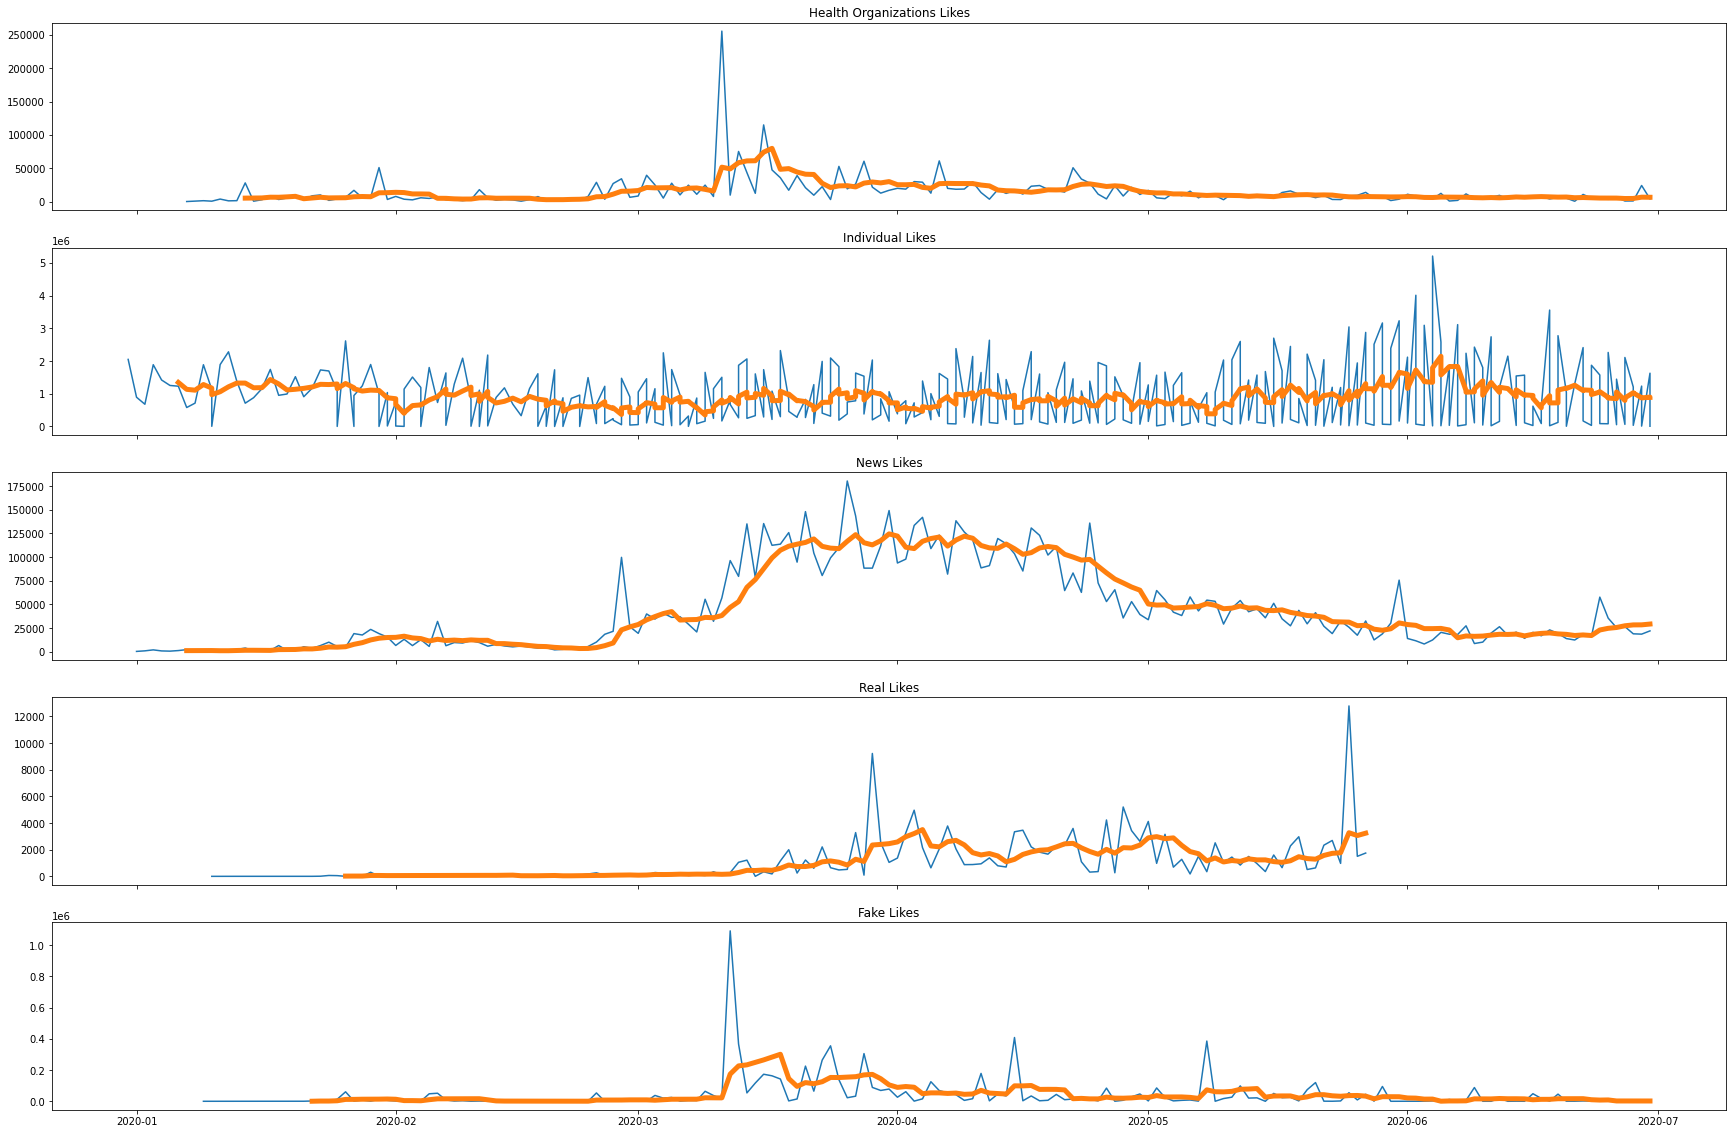

In [118]:
# plot likes

fig, axes = plt.subplots(5, 1, figsize=[30, 20], sharex=True)
axes[0].plot(health_likes)
axes[0].plot(health_likes.rolling(window=7).mean(), linewidth=5)
axes[0].set_title("Health Organizations Likes")

axes[1].plot(ind_likes)
axes[1].plot(ind_likes.rolling(window=7).mean(), linewidth=5)
axes[1].set_title("Individual Likes")

axes[2].plot(news_likes)
axes[2].plot(news_likes.rolling(window=7).mean(), linewidth=5)
axes[2].set_title("News Likes")

axes[3].plot(real_likes)
axes[3].plot(real_likes.rolling(window=7).mean(), linewidth=5)
axes[3].set_title("Real Likes")

axes[4].plot(fake_likes)
axes[4].plot(fake_likes.rolling(window=7).mean(), linewidth=5)
axes[4].set_title("Fake Likes")

Text(0.5, 1.0, 'Fake retweets')

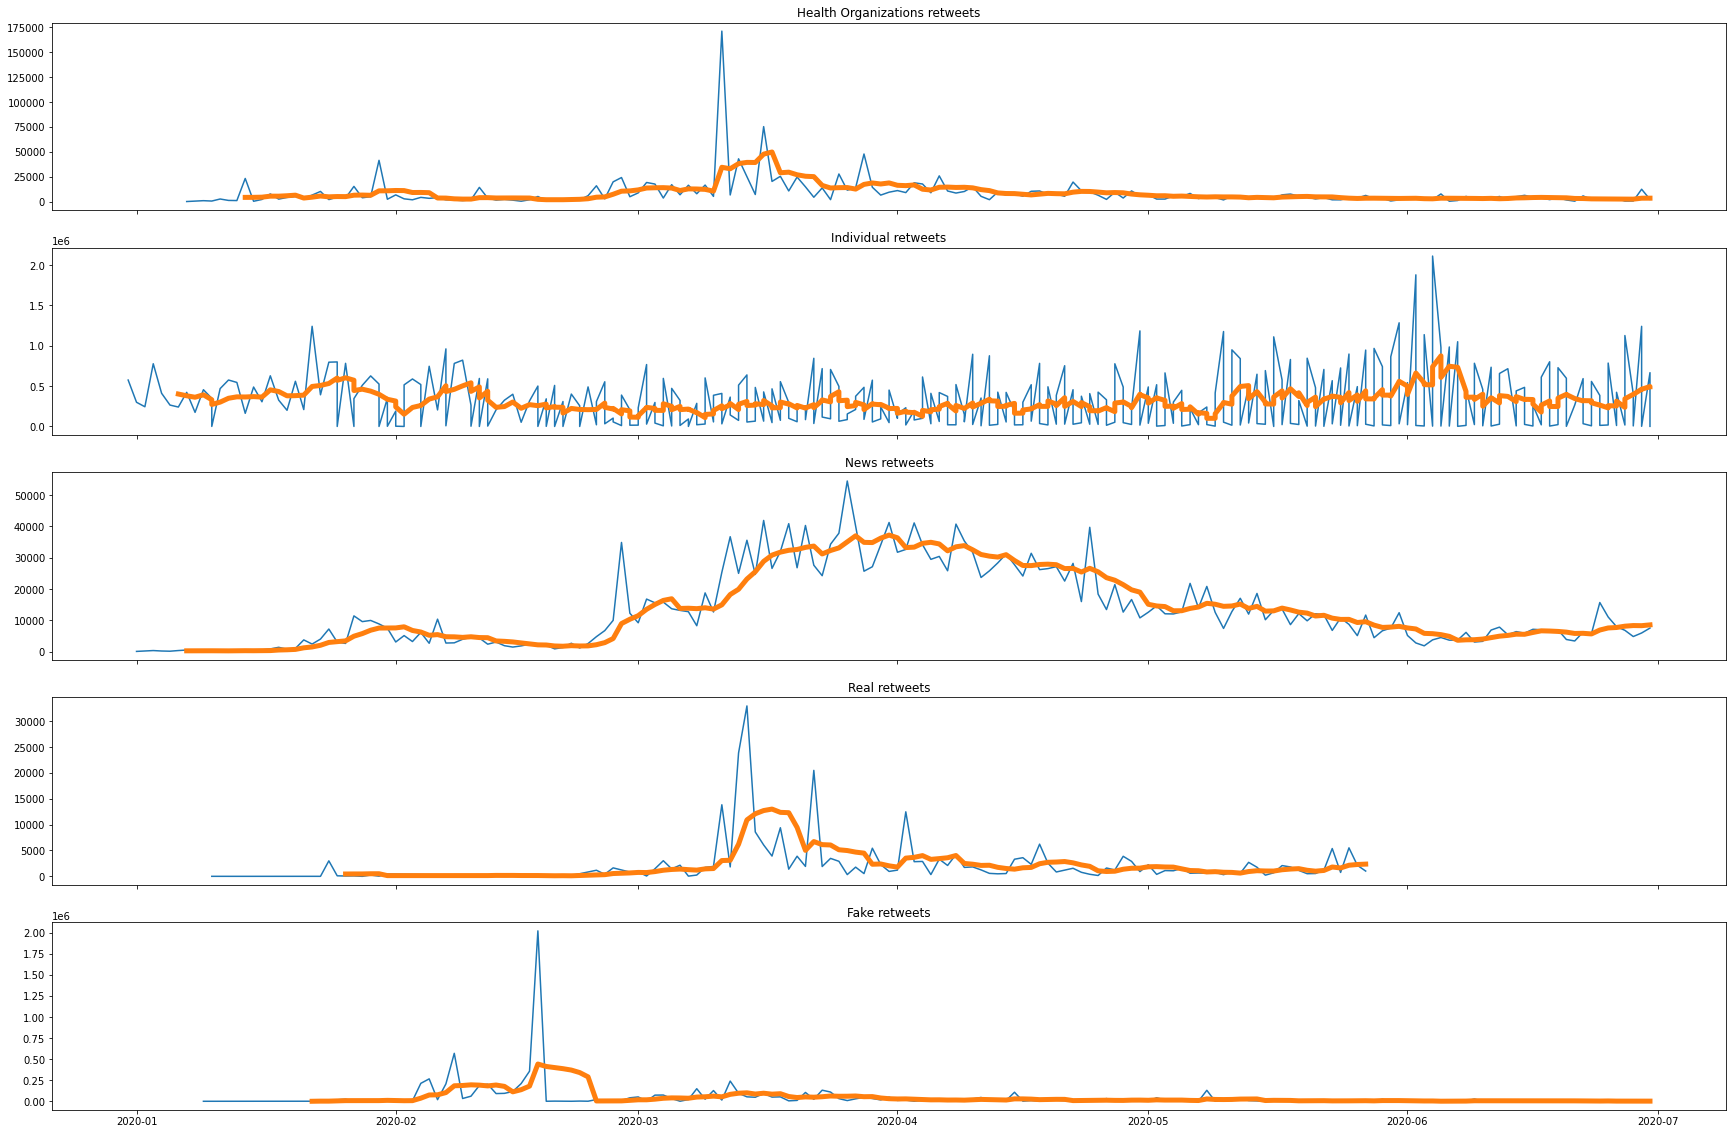

In [119]:
# plot retweets

fig, axes = plt.subplots(5, 1, figsize=[30, 20], sharex=True)
axes[0].plot(health_retweets)
axes[0].plot(health_retweets.rolling(window=7).mean(), linewidth=5)
axes[0].set_title("Health Organizations retweets")

axes[1].plot(ind_retweets)
axes[1].plot(ind_retweets.rolling(window=7).mean(), linewidth=5)
axes[1].set_title("Individual retweets")

axes[2].plot(news_retweets)
axes[2].plot(news_retweets.rolling(window=7).mean(), linewidth=5)
axes[2].set_title("News retweets")

axes[3].plot(real_retweets)
axes[3].plot(real_retweets.rolling(window=7).mean(), linewidth=5)
axes[3].set_title("Real retweets")

axes[4].plot(fake_retweets)
axes[4].plot(fake_retweets.rolling(window=7).mean(), linewidth=5)
axes[4].set_title("Fake retweets")

Text(0.5, 1.0, 'Fake Likes')

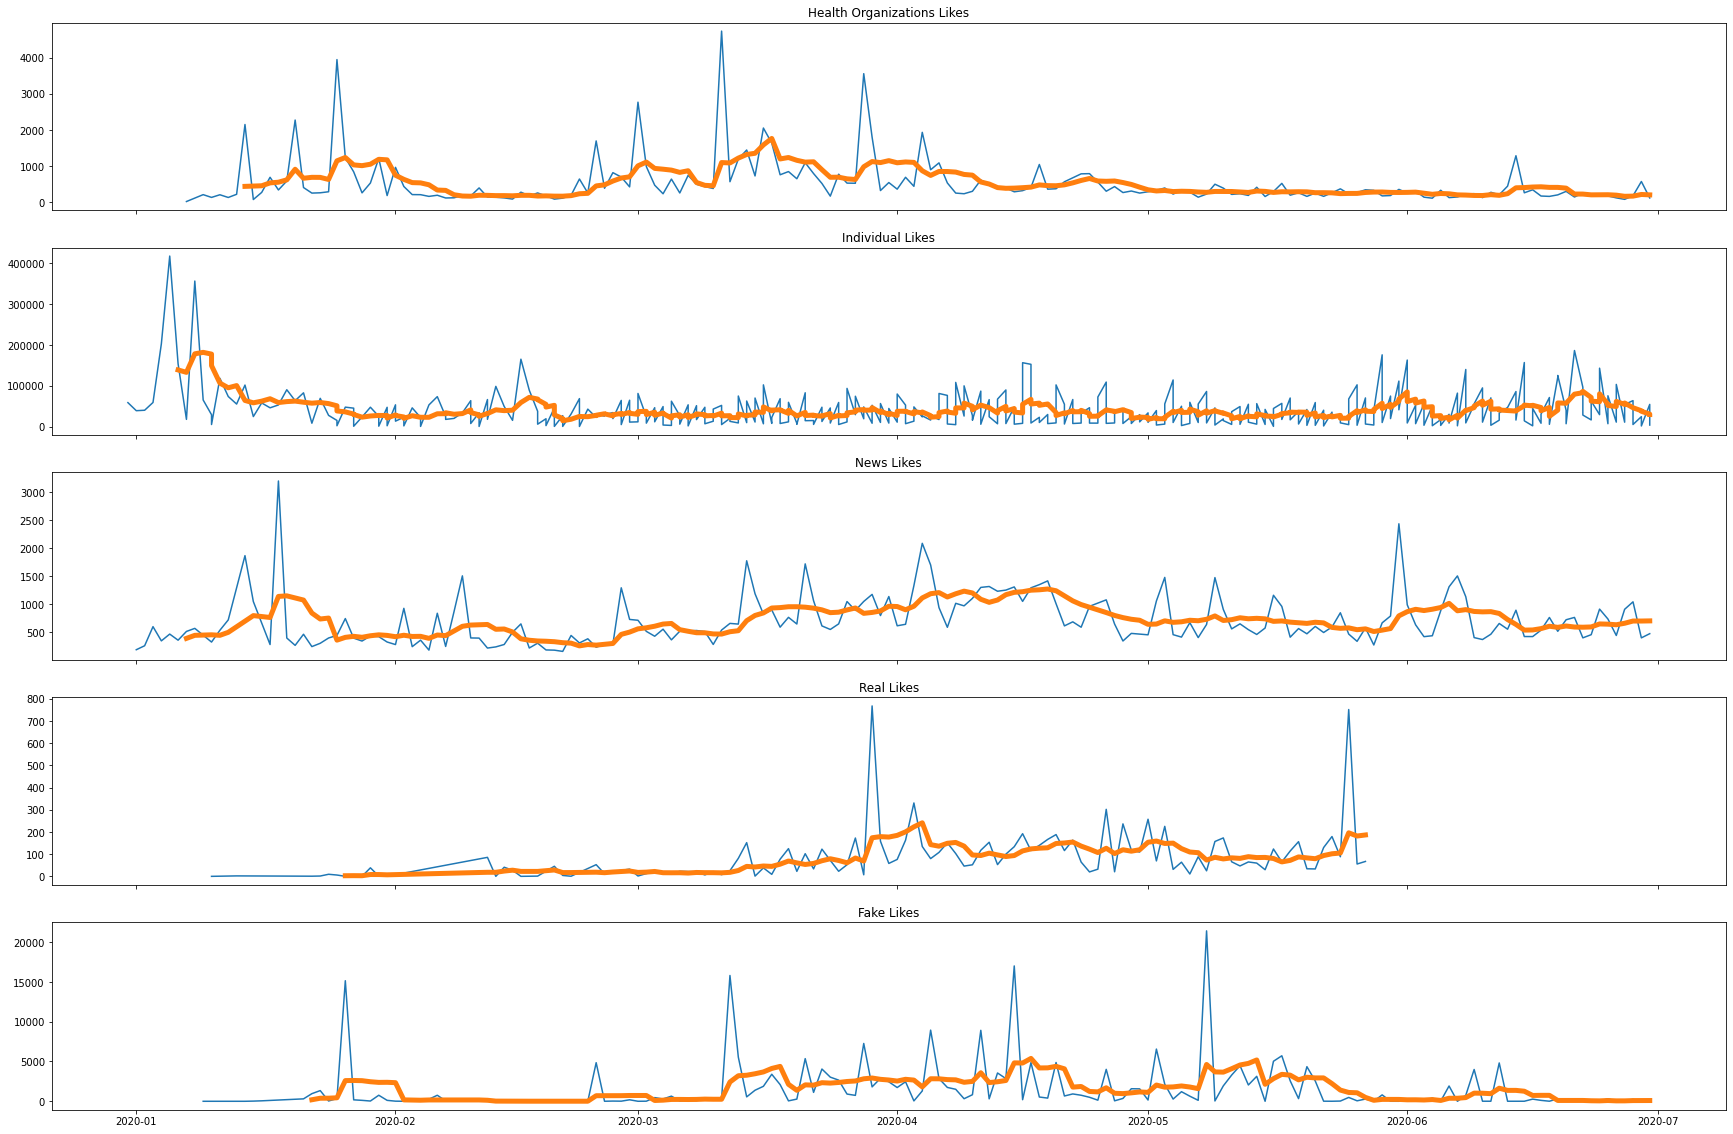

In [149]:
# plot likes divided by number of tweets
healthorg_dates = healthorg_df.sort_values("date", ascending=True)["date"].value_counts()
ind_dates = ind_df.sort_values("date", ascending=True)["date"].value_counts()
news_dates = news_df.sort_values("date", ascending=True)["date"].value_counts()

fake_tweets = fake_dfs.sort_values("date", ascending=True)["date"].value_counts()
real_tweets = real_dfs.sort_values("date", ascending=True)["date"].value_counts()

# plot
fig, axes = plt.subplots(5, 1, figsize=[30, 20], sharex=True)
axes[0].plot(health_likes/healthorg_dates)
axes[0].plot((health_likes/healthorg_dates).rolling(window=7).mean(), linewidth=5)
axes[0].set_title("Health Organizations Likes / Number of Tweets")

axes[1].plot(ind_likes/ind_dates)
axes[1].plot((ind_likes/ind_dates).rolling(window=7).mean(), linewidth=5)
axes[1].set_title("Individual Likes / Number of Tweets")

axes[2].plot(news_likes/news_dates)
axes[2].plot((news_likes/news_dates).rolling(window=7).mean(), linewidth=5)
axes[2].set_title("News Likes / Number of Tweets")

axes[3].plot(real_likes/real_tweets)
axes[3].plot((real_likes/real_tweets).rolling(window=7).mean(), linewidth=5)
axes[3].set_title("Real Likes / Number of Tweets")

axes[4].plot(fake_likes/fake_tweets)
axes[4].plot((fake_likes/fake_tweets).rolling(window=7).mean(), linewidth=5)
axes[4].set_title("Fake Likes / Number of Tweets")

Text(0.5, 1.0, 'Fake retweets / Number of Tweets')

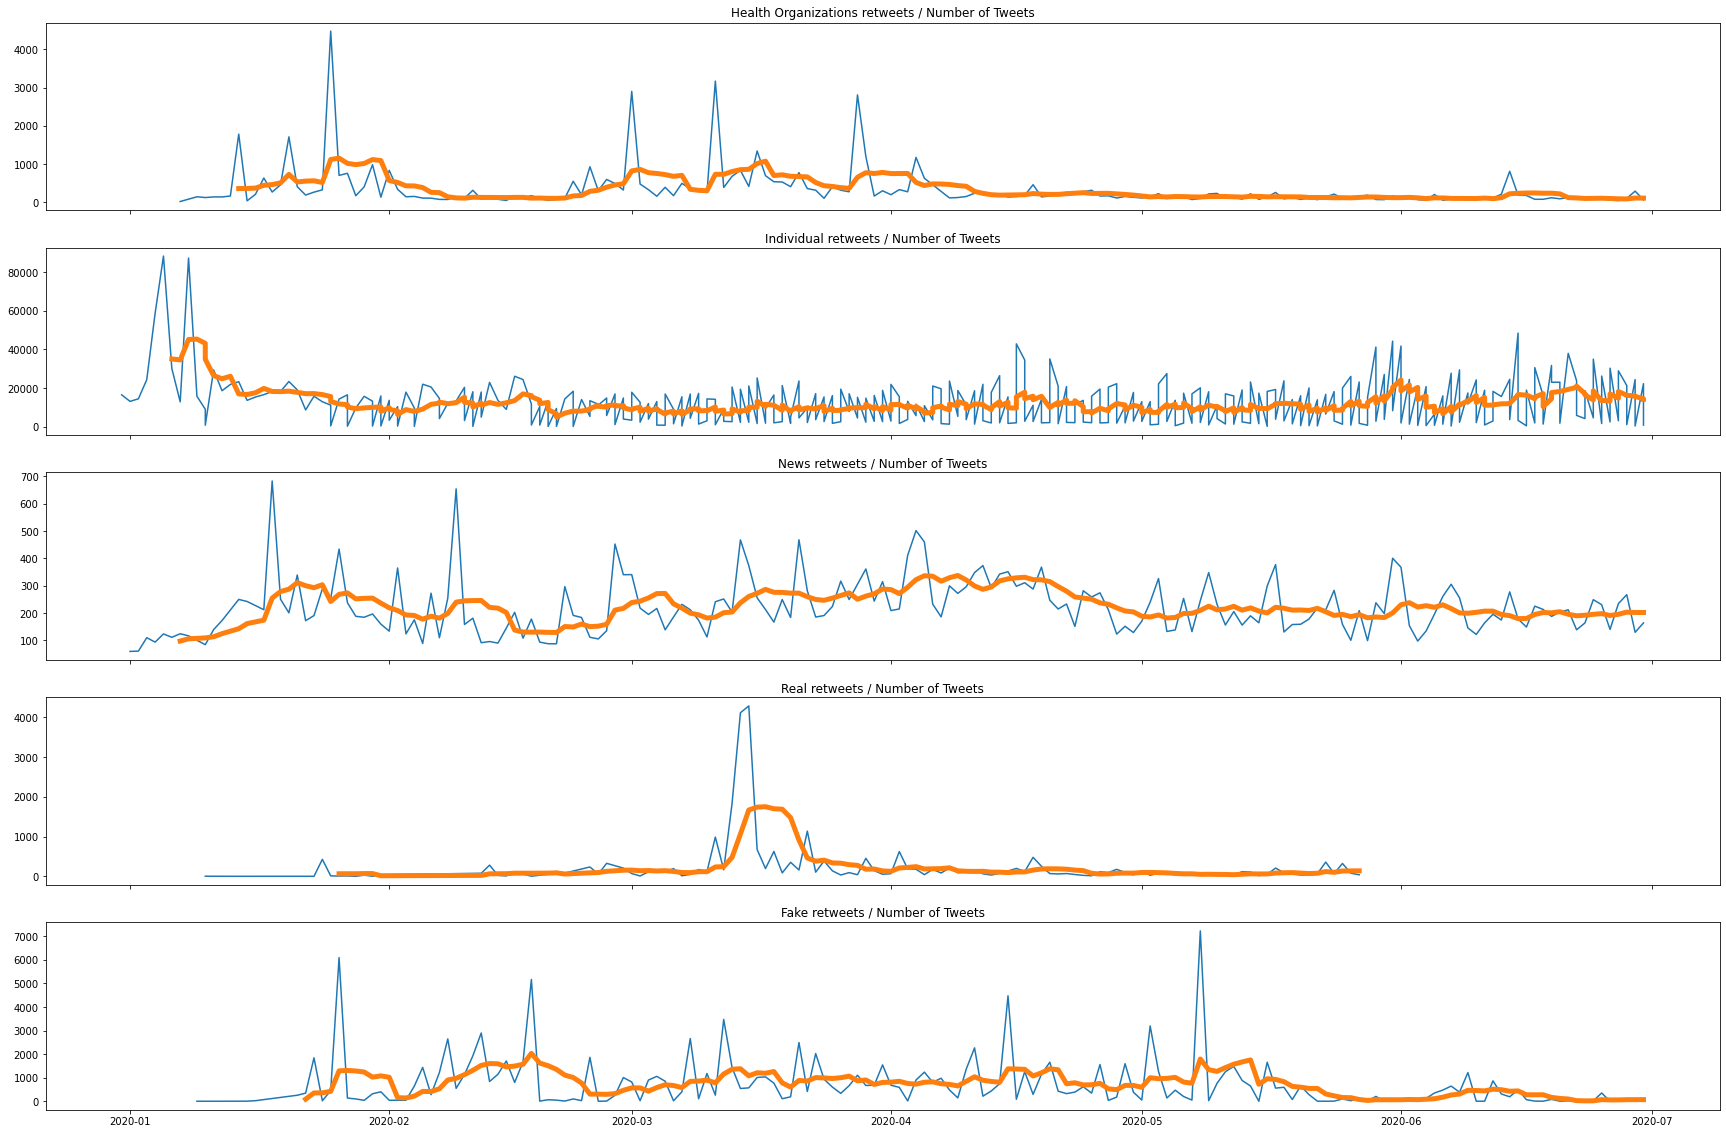

In [150]:
# plot retweets divided by number of tweets
healthorg_dates = healthorg_df.sort_values("date", ascending=True)["date"].value_counts()
ind_dates = ind_df.sort_values("date", ascending=True)["date"].value_counts()
news_dates = news_df.sort_values("date", ascending=True)["date"].value_counts()

fake_tweets = fake_dfs.sort_values("date", ascending=True)["date"].value_counts()
real_tweets = real_dfs.sort_values("date", ascending=True)["date"].value_counts()

# plot
fig, axes = plt.subplots(5, 1, figsize=[30, 20], sharex=True)
axes[0].plot(health_retweets/healthorg_dates)
axes[0].plot((health_retweets/healthorg_dates).rolling(window=7).mean(), linewidth=5)
axes[0].set_title("Health Organizations retweets / Number of Tweets")

axes[1].plot(ind_retweets/ind_dates)
axes[1].plot((ind_retweets/ind_dates).rolling(window=7).mean(), linewidth=5)
axes[1].set_title("Individual retweets / Number of Tweets")

axes[2].plot(news_retweets/news_dates)
axes[2].plot((news_retweets/news_dates).rolling(window=7).mean(), linewidth=5)
axes[2].set_title("News retweets / Number of Tweets")

axes[3].plot(real_retweets/real_tweets)
axes[3].plot((real_retweets/real_tweets).rolling(window=7).mean(), linewidth=5)
axes[3].set_title("Real retweets / Number of Tweets")

axes[4].plot(fake_retweets/fake_tweets)
axes[4].plot((fake_retweets/fake_tweets).rolling(window=7).mean(), linewidth=5)
axes[4].set_title("Fake retweets / Number of Tweets")